In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.sparse.linalg
np.set_printoptions(suppress=True)

In [2]:
def expm_multiply_ground_truth(A, v):
    return scipy.sparse.linalg.expm_multiply(A, v)

In [3]:
def load_A_from_file(name):
    def get_data_path():
        root_dir = "lagrange-ng-regression/"
        data_path = f"50taxa_10regions_2workers_4tpw/{name}/A.txt"
        return root_dir + data_path
    with open(get_data_path(), 'r') as f:
        data = f.read().strip().split()
    n = int(data[0])
    data = np.array(data[1:]).reshape((n, n)).astype('double')
    return n, data

In [4]:
def generate_v(n, seed):
    np.random.seed(seed)
    v = np.random.rand(n).astype('double')
    for i in range(v.shape[0]):
        print(f"v_data[{i}] = {v[i]}", end='')
        if i < v.shape[0]-1:
            print(',', end='')
    print(';')
    return v

In [5]:
n, A = load_A_from_file('11')
v = generate_v(n, 1234)
eAv_true = expm_multiply_ground_truth(A, v)
print(eAv_true)

v_data[0] = 0.1915194503788923,v_data[1] = 0.6221087710398319,v_data[2] = 0.4377277390071145,v_data[3] = 0.7853585837137692,v_data[4] = 0.7799758081188035,v_data[5] = 0.2725926052826416,v_data[6] = 0.2764642551430967,v_data[7] = 0.8018721775350193,v_data[8] = 0.9581393536837052,v_data[9] = 0.8759326347420947,v_data[10] = 0.35781726995786667,v_data[11] = 0.5009951255234587,v_data[12] = 0.6834629351721363,v_data[13] = 0.7127020269829002,v_data[14] = 0.37025075479039493,v_data[15] = 0.5611961860656249,v_data[16] = 0.5030831653078097,v_data[17] = 0.013768449590682241,v_data[18] = 0.772826621612374,v_data[19] = 0.8826411906361166,v_data[20] = 0.3648859839013723,v_data[21] = 0.6153961784334937,v_data[22] = 0.07538124164297655,v_data[23] = 0.3688240060019745,v_data[24] = 0.9331401019825216,v_data[25] = 0.6513781432265774,v_data[26] = 0.3972025777261542,v_data[27] = 0.7887301429407455,v_data[28] = 0.31683612216887125,v_data[29] = 0.5680986526260692,v_data[30] = 0.8691273895612258,v_data[31] = 

m = 12
0.009166602403426509


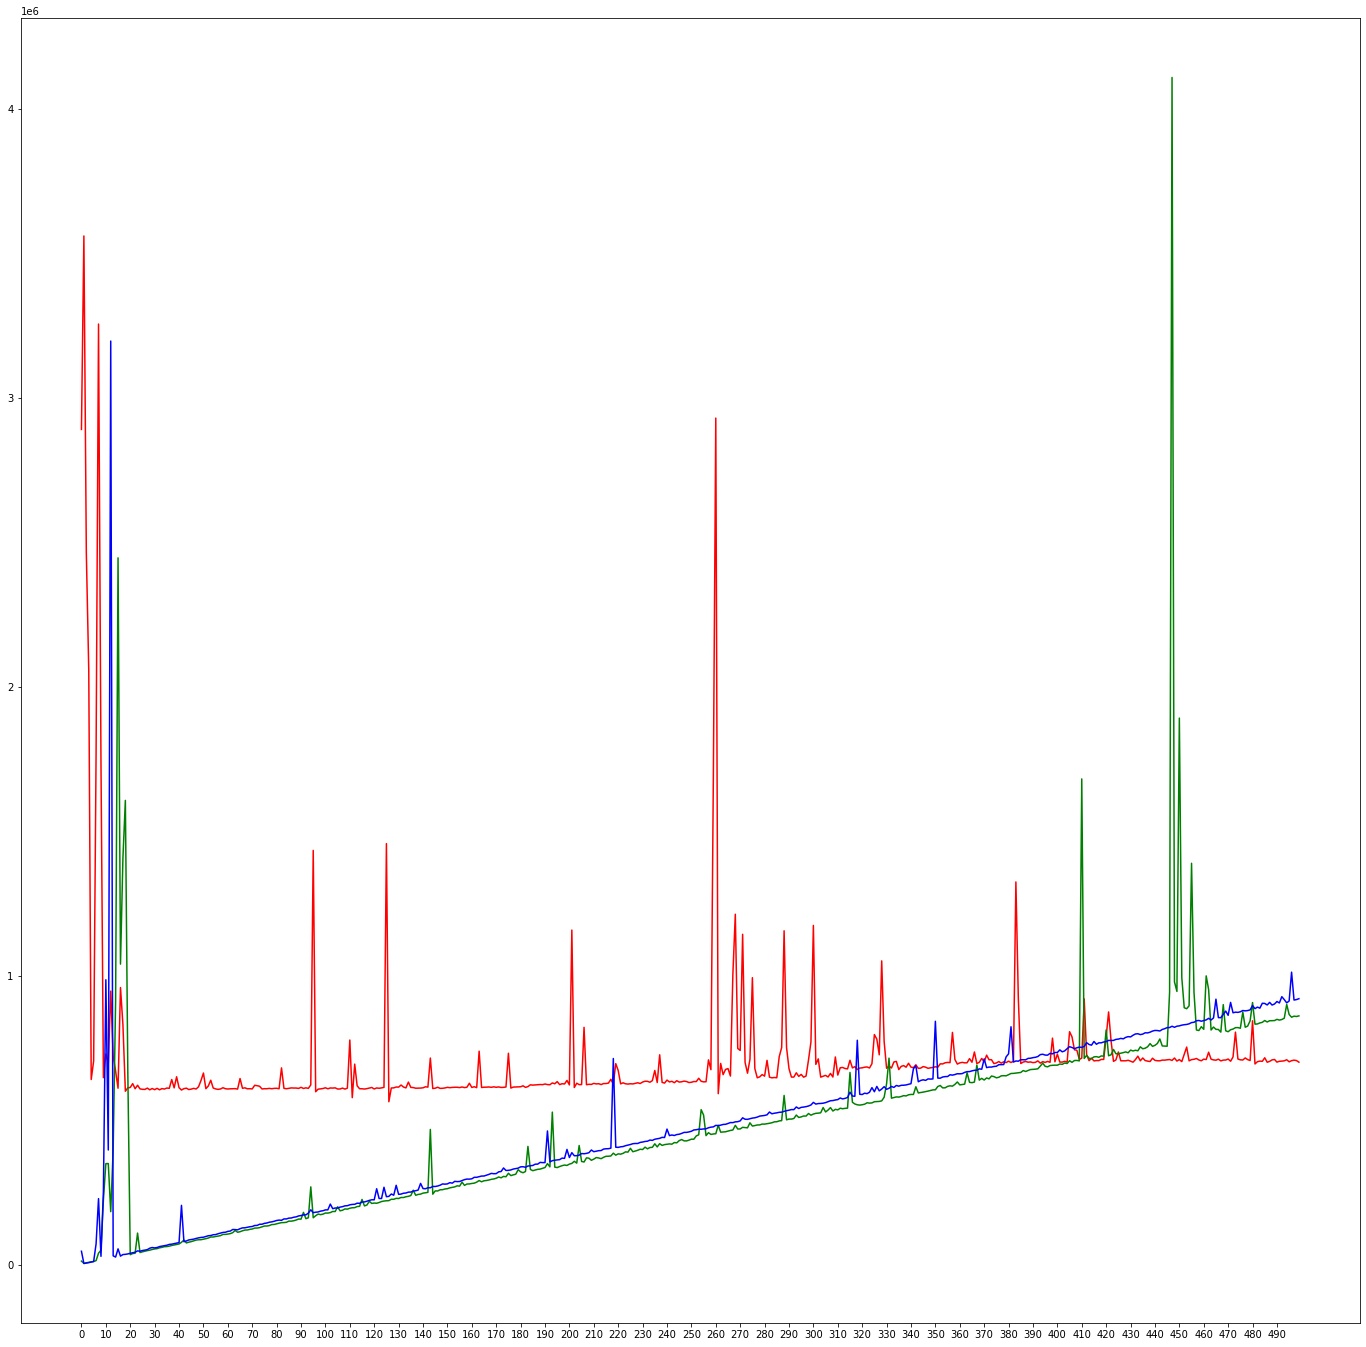

In [6]:
print("m = 12")
eAv_cpp = [0.190126, 0.382305, 0.382839, 0.445925, 0.381608, 0.443714, 0.445073, 0.468359, 0.381508, 0.444858, 0.444837, 0.467912, 0.443362, 0.467485, 0.467114, 0.477124, 0.382741, 0.444416, 0.446392, 0.468945, 0.445041, 0.467556, 0.468415, 0.477393, 0.443968, 0.467327, 0.46721, 0.477804, 0.46814, 0.476772, 0.477038, 0.480741, 0.382384, 0.444501, 0.444891, 0.467834, 0.444957, 0.468031, 0.468503, 0.477313, 0.44433, 0.468415, 0.467469, 0.477851, 0.467565, 0.477165, 0.477174, 0.480872, 0.444233, 0.467504, 0.468115, 0.477666, 0.467678, 0.477219, 0.477801, 0.481322, 0.467919, 0.476927, 0.477424, 0.481055, 0.477445, 0.480718, 0.481042, 0.483333, 0.382586, 0.446314, 0.445914, 0.468676, 0.445031, 0.467533, 0.46748, 0.47716, 0.445014, 0.468257, 0.467832, 0.477316, 0.467976, 0.477134, 0.47698, 0.481182, 0.445191, 0.468179, 0.467952, 0.477435, 0.468187, 0.476901, 0.477417, 0.481381, 0.467733, 0.476841, 0.477294, 0.481155, 0.476953, 0.481204, 0.48129, 0.483365, 0.446196, 0.468656, 0.468837, 0.477883, 0.468811, 0.477115, 0.476966, 0.481332, 0.46768, 0.476962, 0.477688, 0.481272, 0.476897, 0.481199, 0.481054, 0.483346, 0.468388, 0.476838, 0.477642, 0.481738, 0.477908, 0.48122, 0.481493, 0.483465, 0.477092, 0.48106, 0.481436, 0.483415, 0.48115, 0.483251, 0.483428, 0.484478, 0.383321, 0.446963, 0.446783, 0.468756, 0.446207, 0.468578, 0.468732, 0.478086, 0.445171, 0.469031, 0.468027, 0.477781, 0.467992, 0.477977, 0.477574, 0.481356, 0.445841, 0.46876, 0.469184, 0.478338, 0.468412, 0.477928, 0.477659, 0.481262, 0.468186, 0.47754, 0.477839, 0.481304, 0.477616, 0.481115, 0.480969, 0.483577, 0.445928, 0.468757, 0.468629, 0.477765, 0.468956, 0.477881, 0.477736, 0.481663, 0.467885, 0.478111, 0.477812, 0.481403, 0.477891, 0.481396, 0.481116, 0.48353, 0.468239, 0.477315, 0.477743, 0.48146, 0.477859, 0.480866, 0.481271, 0.483385, 0.477315, 0.481228, 0.480991, 0.483453, 0.48096, 0.483389, 0.483412, 0.484726, 0.445953, 0.468216, 0.468488, 0.477508, 0.468108, 0.477385, 0.477379, 0.481217, 0.467973, 0.47698, 0.477492, 0.481518, 0.476866, 0.481295, 0.480973, 0.483278, 0.468489, 0.477508, 0.478004, 0.481548, 0.477726, 0.481211, 0.481347, 0.483259, 0.47695, 0.481365, 0.481397, 0.483363, 0.481351, 0.483345, 0.483293, 0.484552, 0.468852, 0.477463, 0.477474, 0.481547, 0.477895, 0.481467, 0.481468, 0.48339, 0.477704, 0.481175, 0.481315, 0.483457, 0.48136, 0.483507, 0.483253, 0.484675, 0.477918, 0.481137, 0.482093, 0.483652, 0.481392, 0.483273, 0.483698, 0.484541, 0.481409, 0.483085, 0.48351, 0.484384, 0.483203, 0.484404, 0.484697, 0.484782, 0.381389, 0.446063, 0.445893, 0.468888, 0.44689, 0.469251, 0.46815, 0.47759, 0.444084, 0.467454, 0.467961, 0.476991, 0.46733, 0.477086, 0.47707, 0.481213, 0.446176, 0.468471, 0.468989, 0.477905, 0.469106, 0.47725, 0.478147, 0.481377, 0.467683, 0.476841, 0.477325, 0.481312, 0.477276, 0.48117, 0.481062, 0.483177, 0.446252, 0.468508, 0.468379, 0.477724, 0.468986, 0.477843, 0.477858, 0.48187, 0.46801, 0.477016, 0.47732, 0.481299, 0.477587, 0.481329, 0.48101, 0.483576, 0.468614, 0.477318, 0.477694, 0.481713, 0.477959, 0.481184, 0.481577, 0.483704, 0.477284, 0.481126, 0.481075, 0.483334, 0.481171, 0.483217, 0.483202, 0.484381, 0.446486, 0.468622, 0.468101, 0.477602, 0.468517, 0.477357, 0.477113, 0.481301, 0.467723, 0.476821, 0.476967, 0.481364, 0.477255, 0.481349, 0.481091, 0.483026, 0.468476, 0.476896, 0.477954, 0.481527, 0.477595, 0.48118, 0.481232, 0.483229, 0.476984, 0.481151, 0.481718, 0.483328, 0.481128, 0.483201, 0.483117, 0.484223, 0.468701, 0.477802, 0.477411, 0.481687, 0.478138, 0.48166, 0.481359, 0.483397, 0.477168, 0.481417, 0.48141, 0.483597, 0.481538, 0.483505, 0.483256, 0.484293, 0.477208, 0.481457, 0.48223, 0.483655, 0.481401, 0.483246, 0.483486, 0.484572, 0.481301, 0.483115, 0.483355, 0.484288, 0.483325, 0.484261, 0.484295, 0.484904, 0.446587, 0.468583, 0.468509, 0.477971, 0.469734, 0.477818, 0.478046, 0.481748, 0.467692, 0.477697, 0.477174, 0.481562, 0.477416, 0.481372, 0.481184, 0.483596, 0.468531, 0.477256, 0.478441, 0.481486, 0.477651, 0.480916, 0.481258, 0.483524, 0.477185, 0.481375, 0.481265, 0.483547, 0.481294, 0.483322, 0.483229, 0.484385, 0.468878, 0.477461, 0.477973, 0.48172, 0.478477, 0.481396, 0.48168, 0.483743, 0.477779, 0.481279, 0.481091, 0.483659, 0.481422, 0.483581, 0.483456, 0.484747, 0.477857, 0.481076, 0.481345, 0.483776, 0.481279, 0.483183, 0.483531, 0.484561, 0.481121, 0.483294, 0.483611, 0.484638, 0.483369, 0.484478, 0.484571, 0.484658, 0.468564, 0.477759, 0.477517, 0.481513, 0.478049, 0.481434, 0.481383, 0.4833, 0.47721, 0.481162, 0.481203, 0.483371, 0.481319, 0.483469, 0.483104, 0.484312, 0.477268, 0.48109, 0.48193, 0.483538, 0.481277, 0.483143, 0.48347, 0.484273, 0.481487, 0.483295, 0.483495, 0.484381, 0.483182, 0.484207, 0.484348, 0.484665, 0.477847, 0.481343, 0.481817, 0.483661, 0.481898, 0.483306, 0.483608, 0.484624, 0.481423, 0.483279, 0.483495, 0.484556, 0.483523, 0.484469, 0.484556, 0.484771, 0.481803, 0.483255, 0.484008, 0.484494, 0.483329, 0.484406, 0.484636, 0.484831, 0.483581, 0.484214, 0.484263, 0.484889, 0.484383, 0.484657, 0.484657, 0.485415, 0.38393, 0.445459, 0.446296, 0.468841, 0.445583, 0.467359, 0.468907, 0.477087, 0.444665, 0.468323, 0.468142, 0.477493, 0.467979, 0.477173, 0.476999, 0.481447, 0.445854, 0.467672, 0.469647, 0.477627, 0.468789, 0.477322, 0.47786, 0.48166, 0.468119, 0.477924, 0.477963, 0.481496, 0.477691, 0.480995, 0.481621, 0.483506, 0.445945, 0.468085, 0.467765, 0.477652, 0.468654, 0.47728, 0.477503, 0.481219, 0.467654, 0.477407, 0.477389, 0.481468, 0.477267, 0.48107, 0.48117, 0.483432, 0.468758, 0.477385, 0.477761, 0.481556, 0.478267, 0.481082, 0.481384, 0.483537, 0.477599, 0.48148, 0.481146, 0.483817, 0.481323, 0.483399, 0.483593, 0.484793, 0.446933, 0.468928, 0.468704, 0.477641, 0.468325, 0.477494, 0.477149, 0.481766, 0.468374, 0.477666, 0.477147, 0.481732, 0.476913, 0.481452, 0.481587, 0.483477, 0.469153, 0.477485, 0.478467, 0.481692, 0.478164, 0.481598, 0.481823, 0.483568, 0.477829, 0.481832, 0.482032, 0.483825, 0.481781, 0.48354, 0.483508, 0.48462, 0.468986, 0.47735, 0.477972, 0.481757, 0.47773, 0.481356, 0.481307, 0.483357, 0.476859, 0.481428, 0.481625, 0.48366, 0.481488, 0.483231, 0.483401, 0.484475, 0.477515, 0.481766, 0.482044, 0.4836, 0.481598, 0.483306, 0.483586, 0.484512, 0.48161, 0.483487, 0.483783, 0.484806, 0.483465, 0.484404, 0.484507, 0.485103, 0.447614, 0.469245, 0.468976, 0.478121, 0.469126, 0.478278, 0.477998, 0.48165, 0.468528, 0.478306, 0.47779, 0.481551, 0.478228, 0.481257, 0.481378, 0.483648, 0.468893, 0.47746, 0.478455, 0.481481, 0.477686, 0.48095, 0.481444, 0.483594, 0.478162, 0.481552, 0.481639, 0.483799, 0.481637, 0.483476, 0.483681, 0.484728, 0.469452, 0.478004, 0.478081, 0.481548, 0.478431, 0.481119, 0.48128, 0.483631, 0.478142, 0.481383, 0.481344, 0.48369, 0.481656, 0.483741, 0.483399, 0.484873, 0.477613, 0.481102, 0.481516, 0.483572, 0.481476, 0.483402, 0.483519, 0.484552, 0.481461, 0.483574, 0.483521, 0.484831, 0.483842, 0.484876, 0.484802, 0.484838, 0.469205, 0.477723, 0.477833, 0.481536, 0.477684, 0.481252, 0.481481, 0.483388, 0.477362, 0.481373, 0.481618, 0.483851, 0.481793, 0.483367, 0.483354, 0.484576, 0.477851, 0.481304, 0.482015, 0.483625, 0.481767, 0.48346, 0.483752, 0.484581, 0.4822, 0.483529, 0.483934, 0.484662, 0.483664, 0.484647, 0.484555, 0.484977, 0.477876, 0.481523, 0.481932, 0.483663, 0.481737, 0.48344, 0.483585, 0.484457, 0.481663, 0.483316, 0.483649, 0.484617, 0.483675, 0.484677, 0.484325, 0.484954, 0.48217, 0.483547, 0.484033, 0.484683, 0.483705, 0.484726, 0.484708, 0.485035, 0.483934, 0.484413, 0.48471, 0.485108, 0.484638, 0.48499, 0.484976, 0.485731, 0.447645, 0.468779, 0.468, 0.47727, 0.469626, 0.47732, 0.477703, 0.481622, 0.46843, 0.477134, 0.476427, 0.481405, 0.477379, 0.481199, 0.481207, 0.483185, 0.469026, 0.477496, 0.478254, 0.481472, 0.477892, 0.481413, 0.481715, 0.483711, 0.477724, 0.481417, 0.48145, 0.483555, 0.481482, 0.483391, 0.483522, 0.484332, 0.469532, 0.47802, 0.477711, 0.481685, 0.478399, 0.481156, 0.481211, 0.483624, 0.477487, 0.481467, 0.481087, 0.483474, 0.481193, 0.4833, 0.483383, 0.484371, 0.477754, 0.481355, 0.481649, 0.483765, 0.481661, 0.483386, 0.483637, 0.484497, 0.481269, 0.483502, 0.483415, 0.484565, 0.4834, 0.484371, 0.484464, 0.484838, 0.469208, 0.477957, 0.477718, 0.481667, 0.478394, 0.481693, 0.48156, 0.483381, 0.477796, 0.48182, 0.481718, 0.483594, 0.481725, 0.483406, 0.483387, 0.484195, 0.478031, 0.481521, 0.481941, 0.48357, 0.481628, 0.483274, 0.483539, 0.484482, 0.481901, 0.483654, 0.483703, 0.484627, 0.483694, 0.48451, 0.484384, 0.484942, 0.478094, 0.481853, 0.48192, 0.483595, 0.481471, 0.483335, 0.48351, 0.484509, 0.481552, 0.483532, 0.483462, 0.48432, 0.483377, 0.484484, 0.484216, 0.485003, 0.482039, 0.483483, 0.483729, 0.484427, 0.483305, 0.484459, 0.484569, 0.48508, 0.483623, 0.484245, 0.484542, 0.485134, 0.484507, 0.484988, 0.484878, 0.485307, 0.469665, 0.477765, 0.477942, 0.481463, 0.478478, 0.481469, 0.481768, 0.483512, 0.478286, 0.48145, 0.481239, 0.483483, 0.481676, 0.483563, 0.483634, 0.484405, 0.477609, 0.481048, 0.481346, 0.483406, 0.481705, 0.483108, 0.483243, 0.484438, 0.481851, 0.483614, 0.483663, 0.484501, 0.483741, 0.484408, 0.484525, 0.484721, 0.478207, 0.481279, 0.481534, 0.483471, 0.481523, 0.483298, 0.483412, 0.484573, 0.48137, 0.483475, 0.483235, 0.484636, 0.48372, 0.484801, 0.484529, 0.484794, 0.481545, 0.483332, 0.483533, 0.484437, 0.483469, 0.48448, 0.484374, 0.484731, 0.483819, 0.484421, 0.484413, 0.484808, 0.484577, 0.484654, 0.484564, 0.485606, 0.47788, 0.481394, 0.481826, 0.483484, 0.482061, 0.483223, 0.483594, 0.484575, 0.481785, 0.483429, 0.483532, 0.484361, 0.483507, 0.484434, 0.484398, 0.484866, 0.481981, 0.483246, 0.483586, 0.484507, 0.483265, 0.484311, 0.484382, 0.484667, 0.483999, 0.484351, 0.484603, 0.484746, 0.484547, 0.484851, 0.48476, 0.485238, 0.482017, 0.483424, 0.483814, 0.484476, 0.483554, 0.484567, 0.484547, 0.484864, 0.483706, 0.484321, 0.484528, 0.484901, 0.484605, 0.484852, 0.484761, 0.485426, 0.483803, 0.484304, 0.484526, 0.484949, 0.48456, 0.484659, 0.484841, 0.485497, 0.484389, 0.484924, 0.484964, 0.485274, 0.48494, 0.485414, 0.485344, 0.485344]
np.set_printoptions(threshold=1024)
print(np.abs((eAv_cpp - eAv_true) / eAv_true).max())
timings_pade_ss = [2.89149e+06, 3.56142e+06, 2.46365e+06, 2.05601e+06, 640601, 704756, 1.76911e+06, 3.25638e+06, 1.74496e+06, 646998, 729249, 695977, 946750, 721873, 669756, 610425, 958928, 830698, 599961, 611762, 613011, 626355, 608632, 620754, 608076, 606665, 606267, 610790, 604871, 609405, 605351, 610052, 604880, 609119, 607537, 611044, 610038, 640575, 611649, 650058, 612317, 604140, 608947, 610612, 605796, 607320, 609882, 607736, 615495, 637263, 663009, 608758, 618203, 638078, 611165, 608020, 606383, 607803, 612191, 608679, 607680, 608371, 608660, 608927, 607365, 644030, 610262, 611754, 608467, 608687, 608023, 620598, 619164, 617256, 607852, 608773, 608683, 609847, 608725, 609900, 610192, 608525, 680778, 609913, 608667, 609899, 611522, 611031, 611043, 609767, 613477, 609635, 611751, 609930, 621880, 1.43395e+06, 598299, 607221, 608119, 609463, 611907, 608452, 611289, 610900, 611707, 607678, 607760, 610857, 607437, 610709, 777344, 577725, 693882, 618749, 608674, 608543, 607559, 608994, 610844, 612940, 607812, 611312, 610264, 611544, 613256, 1.45737e+06, 563624, 611202, 611645, 614603, 614187, 621475, 614500, 611606, 631636, 613248, 612658, 610444, 610549, 610927, 611870, 615437, 614204, 714886, 609337, 610467, 613829, 609889, 610155, 611408, 613452, 612281, 613257, 613699, 613754, 612634, 614752, 612588, 613869, 627707, 613086, 615580, 612358, 738707, 612938, 613967, 614104, 614773, 613572, 615274, 613647, 614952, 613123, 613530, 614606, 731507, 610920, 614351, 614629, 614866, 615445, 618798, 613333, 616057, 622187, 621180, 621969, 622841, 623197, 622751, 624993, 623023, 622469, 628693, 625739, 633308, 622957, 626019, 625084, 637428, 621911, 1.15804e+06, 612829, 627690, 622894, 623112, 821285, 622550, 624030, 623589, 627123, 625348, 626056, 623137, 626545, 626623, 628169, 641374, 624331, 695514, 671816, 625548, 629163, 625779, 624712, 625875, 625298, 627284, 629257, 626680, 631773, 634667, 634387, 631123, 636675, 671908, 630019, 726195, 630554, 628257, 638629, 632141, 634385, 629499, 636422, 631726, 632809, 635001, 633626, 630081, 631032, 633622, 633386, 644852, 634550, 632432, 632855, 708561, 674662, 1.68679e+06, 2.93084e+06, 591491, 696201, 657398, 675440, 678489, 652604, 1.0046e+06, 1.21285e+06, 748033, 741318, 1.14342e+06, 699805, 662375, 710096, 993166, 678492, 646617, 649722, 657716, 652151, 706993, 648732, 646401, 647548, 646709, 719726, 751284, 1.15554e+06, 751638, 678337, 649066, 649006, 663852, 651435, 658263, 648649, 652614, 708458, 770323, 1.17424e+06, 692917, 711991, 648852, 651959, 654975, 649270, 661616, 649189, 718597, 655882, 681271, 682249, 678633, 677314, 707270, 680800, 684993, 675174, 680142, 681035, 683196, 684050, 680464, 695381, 796275, 780222, 726136, 1.05133e+06, 772289, 679538, 686913, 680427, 701317, 703284, 675093, 686128, 688807, 683194, 696897, 683528, 681677, 691646, 678990, 680094, 685341, 683296, 679283, 681115, 682423, 684670, 683327, 694927, 694532, 698576, 699710, 699018, 803664, 710060, 693969, 698135, 699966, 698228, 698548, 712914, 700340, 735860, 695793, 700192, 713548, 701894, 724917, 709003, 709254, 695662, 697853, 702708, 697370, 701929, 699023, 704136, 699492, 703849, 1.32464e+06, 921367, 695942, 700987, 703043, 700489, 701356, 699054, 700085, 705055, 697310, 702409, 699868, 703270, 700181, 783881, 701909, 728459, 700944, 700861, 703693, 700623, 806136, 788361, 743504, 741870, 710119, 714679, 919756, 726416, 705825, 714229, 704994, 706157, 706023, 710259, 710094, 788005, 874561, 775414, 703430, 708427, 735904, 705432, 705384, 705370, 707130, 704088, 700571, 709550, 721482, 705353, 715123, 706171, 704248, 702949, 714270, 706875, 705538, 705324, 707732, 707604, 708906, 709742, 706669, 714958, 704456, 709570, 702623, 727705, 752841, 705192, 709481, 710566, 713470, 708217, 705525, 711147, 709736, 735088, 711019, 708461, 707421, 711058, 705014, 707747, 708088, 711508, 703890, 718546, 804657, 711567, 708770, 708085, 715281, 709483, 706349, 843946, 694426, 702330, 704250, 703534, 715856, 700394, 703469, 708503, 710032, 700831, 703704, 704274, 705311, 708973, 701903, 705775, 707587, 706232, 700604]
timings_arnoldi_chebyshev = [45890, 3519, 4911, 6517, 8346, 10393, 71570, 228146, 28346, 253771, 985952, 396544, 3.19752e+06, 30116, 25814, 54223, 29055, 34503, 35190, 36668, 38898, 40506, 42389, 47179, 45938, 48514, 49834, 51592, 56534, 58830, 57550, 58878, 62117, 63565, 64775, 66763, 69631, 70496, 72420, 74013, 75897, 204898, 78974, 81582, 85094, 86389, 87878, 90346, 92264, 93775, 94566, 97208, 99609, 100347, 103127, 103631, 106544, 108839, 111076, 111720, 114769, 115840, 121275, 120917, 120070, 124016, 126809, 127146, 129049, 130691, 131639, 135057, 135359, 139392, 139512, 142465, 143776, 146440, 147673, 149736, 152439, 153819, 153101, 157842, 157789, 160559, 161048, 163731, 164905, 168190, 169603, 171734, 172036, 177966, 189431, 179379, 181145, 181983, 184846, 186270, 189078, 189383, 209210, 193300, 195687, 195473, 198705, 200328, 203188, 203635, 206698, 208074, 208467, 212293, 211912, 216483, 216671, 219118, 222085, 224194, 224046, 262422, 228623, 228587, 267563, 234754, 235996, 244166, 239950, 274321, 242935, 243899, 246843, 247594, 250583, 250902, 254187, 255532, 257824, 280829, 262997, 262309, 265748, 265833, 270237, 270174, 271808, 274605, 278986, 278199, 279171, 283405, 281712, 287964, 287100, 287487, 290605, 293892, 295881, 295621, 296825, 301926, 301958, 304266, 306279, 306414, 309077, 312078, 315539, 314437, 314739, 320908, 321965, 334263, 325658, 326029, 327521, 330549, 332062, 333659, 338201, 338598, 336786, 340968, 341921, 342980, 347375, 347624, 353566, 352859, 352887, 462438, 355195, 359572, 361153, 362303, 363176, 368432, 367461, 398563, 370421, 387326, 376655, 376923, 378581, 384293, 383497, 384818, 387119, 396552, 390580, 392518, 394154, 394642, 399723, 400769, 401012, 402955, 713320, 406106, 405606, 407520, 408483, 411416, 413388, 415525, 418300, 419111, 419053, 422760, 424104, 426086, 426945, 430839, 429843, 433816, 435340, 436967, 440320, 439762, 468938, 446351, 448479, 446735, 449956, 451135, 453892, 457480, 457511, 459103, 461399, 465852, 466748, 468581, 468326, 469388, 469953, 473496, 475593, 476557, 481850, 480733, 482572, 484943, 485489, 488280, 491517, 491283, 493992, 494611, 497315, 507982, 503020, 502621, 504615, 506980, 508087, 510460, 513913, 514868, 516141, 518298, 527980, 521852, 523904, 525111, 527044, 527555, 530379, 532582, 534294, 536497, 536286, 545535, 540121, 544144, 545192, 546646, 548833, 552435, 561387, 555458, 557352, 557704, 558609, 560578, 563945, 567045, 567718, 569713, 571041, 576625, 573336, 575327, 578300, 596843, 583362, 582558, 776571, 589355, 588612, 593202, 591610, 596629, 612499, 598357, 616563, 601332, 607598, 615801, 606522, 610306, 616537, 613148, 619979, 617584, 620482, 620781, 621800, 623833, 626184, 677900, 687919, 632776, 637337, 639569, 637538, 642643, 642061, 642601, 842218, 645499, 645170, 649314, 650673, 650914, 656993, 655769, 657751, 660621, 660246, 661032, 665271, 667770, 667961, 670489, 672505, 672499, 677503, 676202, 712007, 681779, 683655, 683634, 685681, 686476, 691952, 692111, 692303, 719018, 729423, 823205, 701041, 704753, 703992, 709144, 708934, 708817, 713754, 714250, 716292, 717513, 720209, 726758, 728091, 725204, 724912, 731135, 729459, 734090, 734144, 743148, 736437, 739637, 747306, 754197, 751394, 747389, 750482, 752751, 751903, 755016, 768057, 761769, 759516, 772274, 762656, 767535, 767613, 770536, 771784, 776018, 775763, 775924, 779515, 780484, 782980, 781386, 786379, 789088, 788074, 793744, 798252, 799108, 796024, 797857, 802375, 801908, 804486, 808303, 810500, 810181, 808642, 813927, 816605, 820308, 820529, 825036, 821379, 825188, 826343, 828822, 830335, 831220, 833393, 837744, 838748, 844007, 844996, 842392, 844816, 846960, 852434, 846713, 853743, 918786, 854871, 854707, 866020, 877470, 862807, 907593, 871617, 873728, 873020, 875128, 879439, 878374, 879326, 881629, 896483, 885930, 891320, 887624, 904508, 903975, 898682, 907643, 898447, 902011, 910641, 905678, 927433, 917277, 906009, 912452, 1.01225e+06, 915741, 917358, 920387]
timings_arnoldi_pade_ss = [11769, 3895, 6038, 7434, 9299, 10414, 13503, 39181, 49629, 223856, 349252, 349559, 182967, 397822, 910241, 2.44683e+06, 1.04015e+06, 1.40737e+06, 1.60704e+06, 668242, 34004, 38108, 39074, 108715, 41401, 43970, 46112, 48151, 49752, 52054, 53948, 54969, 57784, 59453, 61735, 62127, 63585, 65930, 67546, 68819, 71104, 77019, 84670, 74861, 77315, 79275, 82048, 84561, 85766, 85865, 87628, 89520, 91698, 95309, 95272, 97080, 98315, 100053, 104180, 104194, 105399, 106994, 110224, 117981, 111713, 113551, 116792, 119304, 119517, 121645, 123043, 126112, 126197, 127651, 130372, 133249, 133248, 134808, 138353, 138705, 140962, 143045, 145033, 145266, 146152, 150253, 150135, 151554, 154031, 157439, 157004, 180390, 158735, 161929, 268839, 161950, 168869, 174707, 172620, 174486, 178245, 178064, 179847, 183698, 183511, 199879, 185919, 187981, 192458, 191699, 194849, 196492, 196845, 200740, 201365, 225386, 202937, 205942, 218998, 211385, 212842, 212108, 214669, 218102, 219787, 220713, 221155, 225875, 225840, 229074, 228537, 232111, 231995, 234643, 236071, 238756, 257282, 239788, 242616, 243765, 247197, 248254, 249698, 467748, 243561, 254866, 254688, 258667, 259090, 261475, 262563, 265413, 267190, 268798, 272502, 271390, 285286, 273970, 278673, 279035, 280635, 281729, 285244, 290766, 286453, 289953, 290909, 292556, 294968, 296238, 298670, 303005, 300273, 305055, 303902, 315920, 307835, 310472, 312598, 328405, 320961, 317848, 322060, 408981, 329199, 324900, 327389, 329573, 330376, 333230, 335815, 349348, 338096, 527655, 337198, 335675, 339320, 342183, 344436, 343050, 347724, 350102, 357433, 351063, 412081, 356744, 354961, 369283, 368155, 360920, 364913, 370369, 368880, 366512, 371212, 374734, 374929, 375912, 385526, 378639, 383206, 382035, 384962, 390022, 389227, 402369, 390566, 392857, 395582, 399117, 398089, 406289, 400566, 405132, 405739, 417921, 407196, 418428, 412385, 415183, 416479, 417585, 416732, 422329, 421335, 428992, 432752, 428197, 427958, 430597, 433949, 433868, 445258, 449050, 536205, 517302, 446342, 456436, 450408, 452053, 452773, 482336, 458216, 459007, 459596, 461954, 464270, 465751, 481883, 469107, 469503, 474978, 474233, 473324, 490621, 479472, 481104, 483144, 483359, 486289, 486113, 487543, 489020, 490805, 493950, 494382, 497207, 498216, 585446, 500998, 503582, 503524, 505591, 517468, 509130, 511126, 514300, 513932, 522835, 517058, 520994, 523476, 524103, 525323, 543449, 528220, 534715, 543265, 531467, 537316, 535522, 541174, 539382, 540710, 541481, 664955, 561765, 555780, 553063, 551924, 553280, 555050, 559991, 558812, 559609, 563709, 564027, 564708, 566663, 579119, 625807, 714525, 575990, 578097, 580312, 579673, 581734, 584743, 583709, 587667, 588927, 588792, 615402, 594082, 595434, 596975, 598619, 600498, 602624, 604691, 604936, 616432, 619786, 611622, 611847, 616713, 618689, 617618, 623645, 632053, 621933, 623455, 624607, 663854, 630840, 629606, 631722, 690581, 638444, 644581, 638794, 646071, 642870, 652623, 650657, 646452, 648277, 653238, 653858, 653326, 657273, 661411, 661780, 662893, 664273, 664999, 671653, 668320, 671910, 675070, 675672, 676340, 677705, 687130, 697140, 686254, 684531, 688889, 689769, 690237, 690116, 694236, 693120, 697656, 695931, 705588, 700012, 706345, 706559, 705099, 1.68145e+06, 713427, 724217, 713837, 712933, 718964, 719795, 717453, 722199, 721236, 812168, 722804, 726148, 744642, 729852, 729136, 731673, 733627, 736131, 733116, 742356, 739472, 741831, 740086, 753678, 747019, 748988, 753974, 764949, 755422, 758866, 765350, 780861, 756801, 756304, 755891, 942914, 4.11021e+06, 978774, 945578, 1.892e+06, 993606, 889067, 885709, 895913, 1.38932e+06, 942876, 812103, 810196, 823460, 814423, 999427, 951959, 811986, 822260, 814250, 813876, 804737, 899918, 809336, 806023, 812996, 815283, 820099, 820400, 818087, 874320, 821619, 825626, 843681, 907022, 832234, 832915, 836462, 838516, 844871, 839748, 844041, 844484, 844627, 848900, 846312, 848296, 852836, 900470, 865674, 856203, 859928, 858733, 860940]
# only one run, it's taking too long...
plt.figure(figsize=(24, 24))
plt.xticks(range(0, 500, 10))
plt.plot(timings_pade_ss, 'r')
plt.plot(timings_arnoldi_pade_ss, 'g')
plt.plot(timings_arnoldi_chebyshev, 'b')

m = 20
0.00014855085912325009


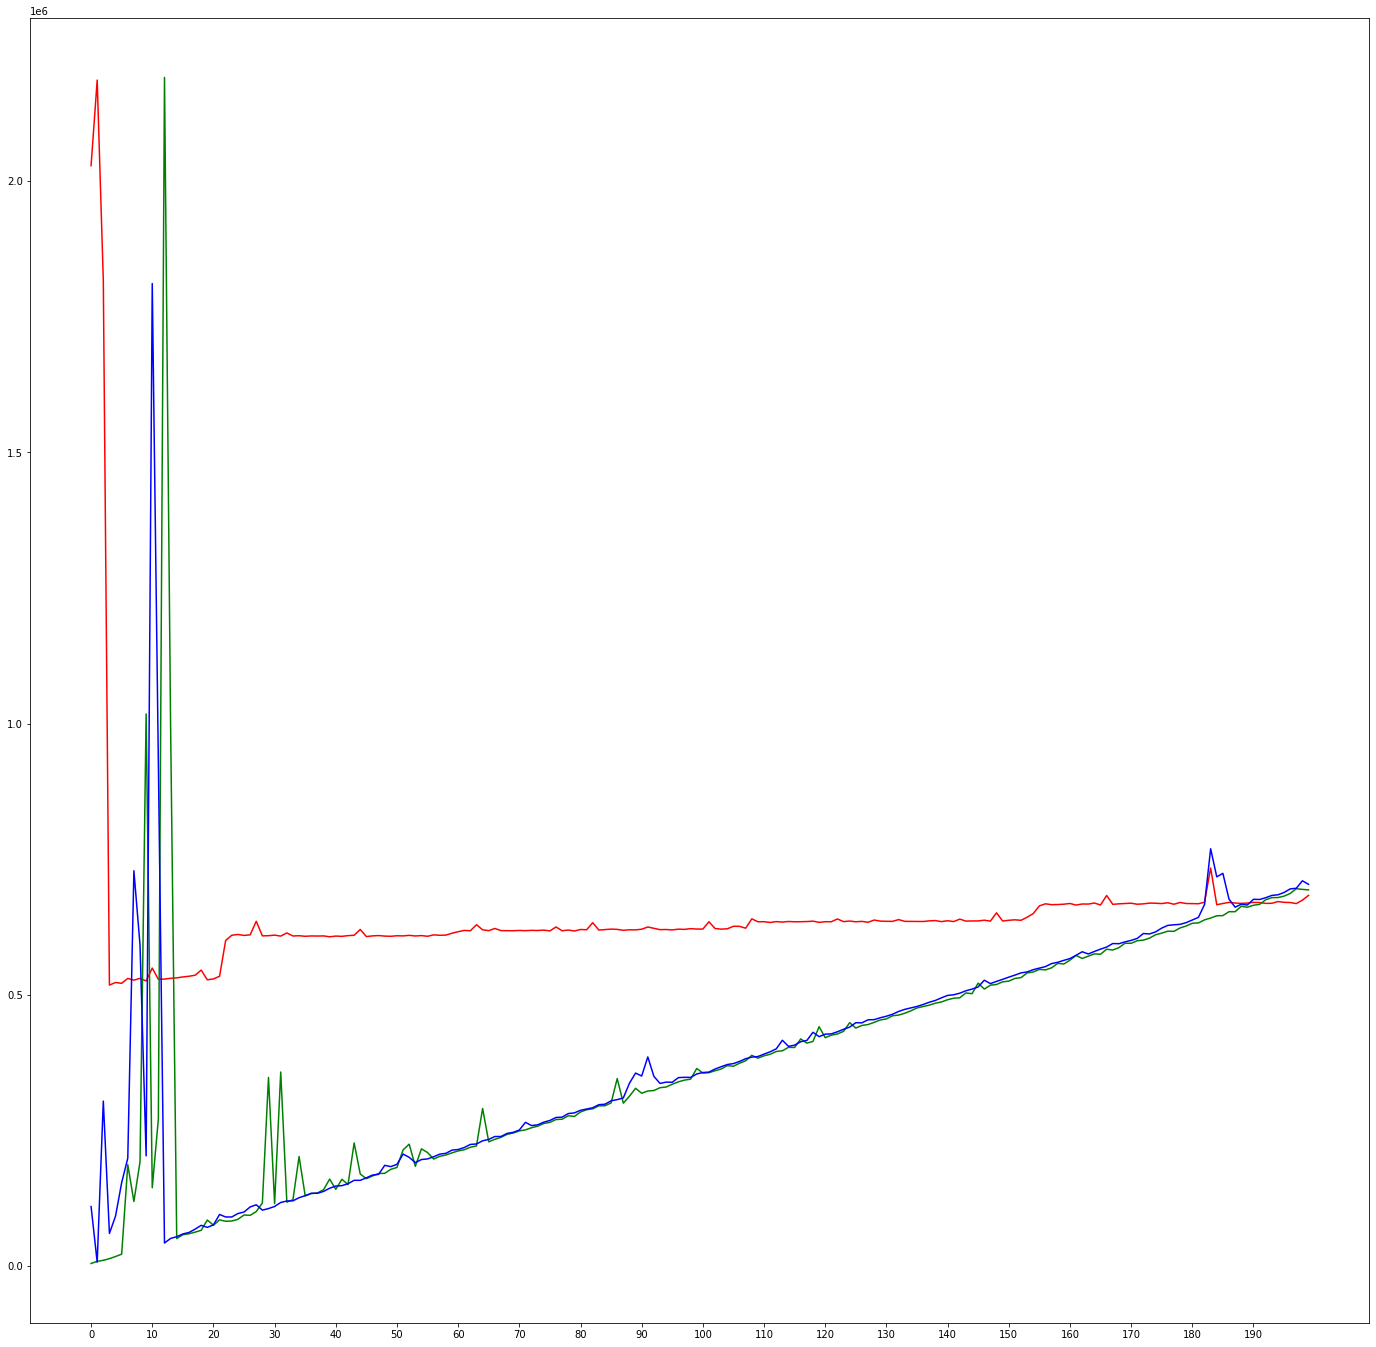

In [7]:
print("m = 20")
eAv_cpp = [0.191491, 0.381271, 0.380983, 0.444634, 0.381523, 0.444893, 0.444735, 0.468131, 0.381903, 0.445073, 0.444914, 0.46823, 0.445173, 0.468369, 0.468269, 0.477708, 0.381163, 0.444727, 0.444575, 0.468051, 0.444831, 0.468188, 0.468094, 0.477605, 0.445009, 0.468286, 0.46819, 0.477666, 0.46833, 0.477747, 0.477683, 0.48191, 0.381273, 0.44475, 0.444591, 0.46804, 0.444854, 0.46818, 0.468084, 0.477588, 0.445033, 0.468278, 0.468178, 0.477644, 0.468319, 0.477729, 0.477663, 0.481891, 0.444687, 0.468096, 0.468001, 0.477542, 0.468141, 0.477624, 0.477561, 0.481824, 0.468237, 0.477684, 0.477618, 0.481864, 0.477702, 0.481918, 0.481867, 0.483951, 0.381009, 0.444659, 0.444502, 0.468013, 0.444759, 0.468149, 0.468055, 0.477584, 0.44494, 0.468251, 0.468147, 0.477644, 0.468289, 0.477726, 0.477659, 0.481897, 0.444598, 0.468069, 0.46797, 0.477539, 0.468112, 0.477621, 0.477558, 0.481828, 0.468208, 0.47768, 0.477615, 0.481868, 0.477697, 0.481923, 0.481873, 0.483958, 0.444619, 0.468063, 0.467963, 0.477521, 0.468107, 0.477606, 0.477538, 0.48181, 0.468202, 0.477663, 0.477595, 0.481849, 0.477683, 0.481903, 0.481853, 0.48394, 0.468021, 0.477558, 0.477493, 0.481781, 0.477575, 0.481836, 0.481788, 0.483894, 0.477635, 0.481877, 0.481828, 0.483921, 0.481882, 0.483962, 0.483921, 0.485041, 0.380539, 0.444442, 0.444283, 0.467898, 0.444541, 0.468038, 0.467943, 0.477517, 0.44472, 0.468135, 0.468037, 0.477578, 0.468179, 0.477659, 0.477593, 0.481853, 0.444379, 0.467954, 0.467858, 0.47747, 0.468002, 0.477554, 0.477489, 0.481783, 0.468093, 0.477613, 0.477548, 0.481822, 0.477631, 0.481879, 0.48183, 0.483927, 0.444399, 0.467949, 0.467849, 0.477456, 0.467992, 0.477539, 0.477473, 0.481765, 0.468085, 0.477596, 0.477529, 0.481804, 0.477616, 0.48186, 0.481811, 0.483909, 0.467907, 0.477487, 0.477425, 0.481737, 0.477509, 0.481793, 0.481744, 0.483862, 0.477566, 0.481829, 0.481781, 0.48389, 0.481839, 0.483931, 0.483891, 0.485018, 0.444307, 0.467919, 0.467818, 0.47745, 0.46796, 0.477534, 0.477466, 0.481772, 0.468057, 0.477593, 0.477524, 0.481808, 0.477609, 0.481865, 0.481816, 0.483916, 0.467873, 0.477484, 0.477418, 0.48174, 0.477503, 0.481797, 0.481748, 0.483868, 0.477561, 0.481835, 0.481786, 0.483897, 0.481843, 0.483938, 0.4839, 0.485026, 0.467869, 0.47747, 0.477401, 0.481722, 0.477489, 0.481778, 0.481727, 0.483851, 0.477547, 0.481819, 0.481769, 0.483879, 0.481826, 0.483921, 0.483881, 0.485009, 0.477435, 0.48175, 0.481698, 0.483832, 0.481759, 0.483872, 0.483833, 0.484973, 0.481796, 0.483901, 0.483861, 0.484996, 0.483903, 0.485028, 0.484994, 0.485649, 0.381115, 0.444711, 0.444555, 0.468042, 0.444819, 0.468184, 0.468085, 0.477601, 0.444991, 0.468278, 0.468177, 0.477662, 0.468321, 0.477747, 0.477678, 0.481908, 0.444653, 0.468101, 0.468, 0.477553, 0.468146, 0.47764, 0.477572, 0.481837, 0.468237, 0.477697, 0.47763, 0.481878, 0.477716, 0.481934, 0.481886, 0.483964, 0.444672, 0.468093, 0.467993, 0.477538, 0.468138, 0.477624, 0.477557, 0.48182, 0.468229, 0.477681, 0.477613, 0.481858, 0.477701, 0.481916, 0.481864, 0.483947, 0.468052, 0.477573, 0.477509, 0.481791, 0.477597, 0.481848, 0.481797, 0.483898, 0.47765, 0.481886, 0.481833, 0.483926, 0.481893, 0.483968, 0.483927, 0.485043, 0.44458, 0.468063, 0.467962, 0.477535, 0.468107, 0.477619, 0.477552, 0.481824, 0.468199, 0.477677, 0.477609, 0.481863, 0.477694, 0.481921, 0.481869, 0.483953, 0.468023, 0.477571, 0.477509, 0.481796, 0.477591, 0.481851, 0.481803, 0.483906, 0.477646, 0.481891, 0.48184, 0.483935, 0.481898, 0.483976, 0.483936, 0.485053, 0.468017, 0.477558, 0.477489, 0.481778, 0.477577, 0.481835, 0.481784, 0.483889, 0.477633, 0.481872, 0.48182, 0.483915, 0.48188, 0.483958, 0.483916, 0.485036, 0.477528, 0.481804, 0.481754, 0.483869, 0.481813, 0.48391, 0.48387, 0.485002, 0.481852, 0.483938, 0.483898, 0.485023, 0.48394, 0.485055, 0.485022, 0.48567, 0.444364, 0.46795, 0.467847, 0.477466, 0.467992, 0.477552, 0.477484, 0.48178, 0.468084, 0.47761, 0.477539, 0.481819, 0.477626, 0.481876, 0.481826, 0.483922, 0.467907, 0.477501, 0.477433, 0.481751, 0.477524, 0.481808, 0.481757, 0.483874, 0.477578, 0.481847, 0.481795, 0.483903, 0.481854, 0.483945, 0.483904, 0.485028, 0.467901, 0.477485, 0.47742, 0.481733, 0.477508, 0.48179, 0.481741, 0.483857, 0.477562, 0.481829, 0.481777, 0.483887, 0.481835, 0.483928, 0.483887, 0.485015, 0.477458, 0.481759, 0.48171, 0.483838, 0.481768, 0.483879, 0.48384, 0.484976, 0.481806, 0.483907, 0.483868, 0.485, 0.483909, 0.485031, 0.484998, 0.485651, 0.467866, 0.477485, 0.477413, 0.481738, 0.477505, 0.481792, 0.481745, 0.483865, 0.477555, 0.481833, 0.481781, 0.483893, 0.48184, 0.483934, 0.483895, 0.485021, 0.477451, 0.481764, 0.481713, 0.483845, 0.481772, 0.483886, 0.483847, 0.484986, 0.481808, 0.483915, 0.483875, 0.48501, 0.483917, 0.485042, 0.485008, 0.485661, 0.477437, 0.481749, 0.481693, 0.483828, 0.481754, 0.483868, 0.483829, 0.484971, 0.481794, 0.483897, 0.483858, 0.484992, 0.483898, 0.485024, 0.484991, 0.485645, 0.481726, 0.48385, 0.48381, 0.484956, 0.483851, 0.484985, 0.484956, 0.485617, 0.48388, 0.485008, 0.484979, 0.485636, 0.485007, 0.48566, 0.485633, 0.486041, 0.380437, 0.444367, 0.444213, 0.467844, 0.444472, 0.467985, 0.467885, 0.477475, 0.444649, 0.468081, 0.467982, 0.477535, 0.468124, 0.477617, 0.477552, 0.48182, 0.444308, 0.467901, 0.467806, 0.477429, 0.467946, 0.477515, 0.477447, 0.481751, 0.468041, 0.477573, 0.477505, 0.481794, 0.477589, 0.481849, 0.481796, 0.483902, 0.444327, 0.467892, 0.467796, 0.477411, 0.467939, 0.477495, 0.477429, 0.481733, 0.468034, 0.477555, 0.477489, 0.481772, 0.477576, 0.48183, 0.481778, 0.483884, 0.467855, 0.47745, 0.477383, 0.481704, 0.477469, 0.481761, 0.481711, 0.483836, 0.477526, 0.481799, 0.481751, 0.483866, 0.481808, 0.483906, 0.483866, 0.484997, 0.444237, 0.467865, 0.467766, 0.477408, 0.467908, 0.477494, 0.477427, 0.481738, 0.468006, 0.477553, 0.477484, 0.481777, 0.477571, 0.481835, 0.481784, 0.483892, 0.467826, 0.477447, 0.477379, 0.481709, 0.477466, 0.481767, 0.481716, 0.483843, 0.477523, 0.481808, 0.481755, 0.483873, 0.481813, 0.483915, 0.483872, 0.485007, 0.467821, 0.477431, 0.477363, 0.481693, 0.47745, 0.481748, 0.481697, 0.483825, 0.477509, 0.481787, 0.481736, 0.483853, 0.481794, 0.483896, 0.483854, 0.484989, 0.477401, 0.481718, 0.48167, 0.483806, 0.481728, 0.483847, 0.483809, 0.484954, 0.481766, 0.483876, 0.483837, 0.484974, 0.483878, 0.485008, 0.484975, 0.485633, 0.444019, 0.467753, 0.467653, 0.477343, 0.467796, 0.477424, 0.477357, 0.481694, 0.467889, 0.477483, 0.477418, 0.481732, 0.477503, 0.481793, 0.481741, 0.48386, 0.467713, 0.477377, 0.477312, 0.481665, 0.4774, 0.481723, 0.481671, 0.483812, 0.477456, 0.48176, 0.481712, 0.483841, 0.481769, 0.483883, 0.483843, 0.484981, 0.467704, 0.477361, 0.477296, 0.481646, 0.477382, 0.481704, 0.481652, 0.483794, 0.477439, 0.481741, 0.481693, 0.483822, 0.48175, 0.483866, 0.483823, 0.484964, 0.477332, 0.481673, 0.481624, 0.483775, 0.481681, 0.483817, 0.483775, 0.484929, 0.48172, 0.483843, 0.483804, 0.484951, 0.483847, 0.484982, 0.484949, 0.485612, 0.467675, 0.477358, 0.47729, 0.481651, 0.477377, 0.481709, 0.481658, 0.483802, 0.477436, 0.481748, 0.481696, 0.48383, 0.481755, 0.483872, 0.483832, 0.484973, 0.477329, 0.481678, 0.48163, 0.483783, 0.481686, 0.483825, 0.483784, 0.484938, 0.481728, 0.483853, 0.483814, 0.484962, 0.483855, 0.484991, 0.48496, 0.485622, 0.477313, 0.481659, 0.481612, 0.483764, 0.481668, 0.483805, 0.483765, 0.484921, 0.481708, 0.483835, 0.483794, 0.484942, 0.483835, 0.484976, 0.484941, 0.485606, 0.481638, 0.483787, 0.483748, 0.484908, 0.483788, 0.484937, 0.484906, 0.485578, 0.483818, 0.484962, 0.484928, 0.485596, 0.48496, 0.485622, 0.485594, 0.48601, 0.444293, 0.467896, 0.467798, 0.477425, 0.467942, 0.47751, 0.477443, 0.481749, 0.468034, 0.477571, 0.477501, 0.481786, 0.477586, 0.481846, 0.481792, 0.483898, 0.467857, 0.477465, 0.477397, 0.481718, 0.477485, 0.481776, 0.481726, 0.48385, 0.477538, 0.481818, 0.481765, 0.483878, 0.481822, 0.483919, 0.483879, 0.48501, 0.467849, 0.477449, 0.477382, 0.481703, 0.477465, 0.481757, 0.481708, 0.483831, 0.477522, 0.481796, 0.481746, 0.483859, 0.481804, 0.483902, 0.483862, 0.484993, 0.47742, 0.481729, 0.481678, 0.483811, 0.481737, 0.483854, 0.483812, 0.484956, 0.481772, 0.483882, 0.483842, 0.484978, 0.483883, 0.485009, 0.484977, 0.485634, 0.467819, 0.477446, 0.477377, 0.481705, 0.477463, 0.481763, 0.481714, 0.483838, 0.477518, 0.481802, 0.481749, 0.483866, 0.481809, 0.483909, 0.483868, 0.485001, 0.477415, 0.481734, 0.481687, 0.48382, 0.481742, 0.48386, 0.483823, 0.484967, 0.481782, 0.48389, 0.483851, 0.484988, 0.483892, 0.485018, 0.484987, 0.485644, 0.477401, 0.481715, 0.481667, 0.483802, 0.481724, 0.483843, 0.483803, 0.484947, 0.481762, 0.483869, 0.483832, 0.48497, 0.483874, 0.485002, 0.484969, 0.485628, 0.481693, 0.483822, 0.483784, 0.484934, 0.483825, 0.484965, 0.484932, 0.485599, 0.483855, 0.484987, 0.484957, 0.485617, 0.484987, 0.485642, 0.485615, 0.486025, 0.467703, 0.477376, 0.477306, 0.481662, 0.477395, 0.481717, 0.481668, 0.483808, 0.47745, 0.481757, 0.481706, 0.483837, 0.481766, 0.483879, 0.483838, 0.484978, 0.477347, 0.481688, 0.481641, 0.483788, 0.481696, 0.48383, 0.483789, 0.484941, 0.481735, 0.483857, 0.483819, 0.484963, 0.483861, 0.484994, 0.484962, 0.485624, 0.47733, 0.48167, 0.481622, 0.48377, 0.481676, 0.483812, 0.483771, 0.484924, 0.481717, 0.48384, 0.4838, 0.484947, 0.483842, 0.484979, 0.484944, 0.485608, 0.481648, 0.483792, 0.483754, 0.484909, 0.483793, 0.484942, 0.484908, 0.485579, 0.483823, 0.484964, 0.484932, 0.485597, 0.484964, 0.485622, 0.485595, 0.48601, 0.477324, 0.481676, 0.481624, 0.483778, 0.481683, 0.483818, 0.483779, 0.484933, 0.481722, 0.483848, 0.483809, 0.484959, 0.48385, 0.484986, 0.484956, 0.485618, 0.481651, 0.4838, 0.483762, 0.48492, 0.483802, 0.484952, 0.484919, 0.485589, 0.483832, 0.484973, 0.484943, 0.485609, 0.484975, 0.485633, 0.485607, 0.486019, 0.481632, 0.48378, 0.483742, 0.484901, 0.483784, 0.484934, 0.484902, 0.485573, 0.483813, 0.484955, 0.484924, 0.485591, 0.484955, 0.485616, 0.485589, 0.486004, 0.483764, 0.484921, 0.48489, 0.485564, 0.484919, 0.485587, 0.485561, 0.48598, 0.484943, 0.485607, 0.485582, 0.485997, 0.485605, 0.486018, 0.485994, 0.486268]
np.set_printoptions(threshold=1024)
print("%.20f" % np.abs((eAv_cpp - eAv_true) / eAv_true).max())
timings_pade_ss = [2.02915e+06, 2.18699e+06, 1.81747e+06, 517424, 522321, 520744, 529768, 526525, 529955, 525053, 548786, 528102, 528566, 529972, 530790, 532462, 533744, 535594, 545134, 527190, 528811, 533702, 599806, 609395, 610893, 609067, 610137, 635143, 608291, 608564, 609591, 607837, 613690, 608009, 608533, 607485, 608105, 607933, 608173, 606584, 607884, 607387, 608686, 609416, 620109, 606954, 608232, 608815, 607849, 607509, 608441, 608188, 609205, 608043, 608776, 607531, 610110, 609319, 609699, 613173, 615900, 618319, 617687, 628833, 619417, 617861, 621899, 618049, 617794, 617769, 618268, 617883, 618421, 618178, 618842, 617452, 624690, 617665, 619029, 617180, 620004, 619521, 632502, 618946, 619877, 620741, 620221, 618555, 619481, 619302, 620562, 624655, 622179, 619743, 619974, 619246, 620656, 620240, 621561, 620836, 620780, 634278, 621828, 620684, 621308, 625962, 625825, 622392, 639667, 634287, 634422, 632983, 634540, 633718, 634790, 634254, 634365, 634682, 635399, 633174, 634373, 634344, 639442, 634515, 635599, 634268, 634984, 633322, 637436, 635486, 635142, 635011, 638284, 635049, 634973, 634818, 634767, 635921, 636484, 634554, 636195, 634617, 639165, 635475, 635780, 635789, 637170, 635456, 650777, 635644, 637003, 637883, 636976, 642633, 649358, 663529, 667384, 665814, 666061, 666673, 668014, 665068, 667048, 666931, 668841, 665248, 682793, 666429, 667335, 667937, 668521, 666602, 667314, 668679, 668468, 667844, 669337, 666615, 669835, 667955, 667708, 667546, 670352, 733464, 665671, 668031, 670023, 668851, 668159, 668783, 670044, 669737, 668140, 668348, 671545, 670135, 669792, 667808, 674117, 682963, 681235, 681321, 683516, 681416, 681195, 682900, 684001, 680989, 681074, 682688, 684319, 682382, 686973, 683455, 684956, 682593, 682033, 685516, 683604, 696910, 682611, 683943, 683485, 682790, 684584, 683787, 684797, 683567, 684806, 683033, 685371, 683789, 683963, 683714, 684236, 684575, 683895, 685658, 684614, 685854, 684486, 692755, 692946, 685560, 684747, 686716, 683652, 685244, 684897, 687595, 684373, 684044, 684915, 687794, 684426, 684573, 685070, 686848, 685288, 686334, 688276, 686463, 684990, 684705, 687024, 687663, 685753, 686627, 687502, 686619, 709967, 685059, 687891, 688350, 687545, 687266, 689120, 686604, 689449, 685864, 689539, 685404, 691496, 685745, 692285, 686480, 691676, 686244, 699384, 687845, 690063, 689787, 692314, 688566, 691529, 690358, 692070, 688790, 696896, 689084, 692073, 688968, 690682, 690189, 693698, 688115, 693175, 689613, 693002, 690274, 691150, 689740, 692356, 691086, 691241, 691842, 693353, 690326, 692111, 691459, 691988, 692246, 705624, 691738, 693535, 695640, 691645, 696514, 694473, 694854, 693029, 691960, 694663, 696342, 691834, 692410, 693500, 695503, 693645, 707196, 692156, 694071, 695024, 693174, 692116, 694735, 698280, 694991, 693046, 696738, 695217, 694277, 695416, 695521, 694613, 700585, 696331, 694284, 696105, 695462, 694875, 695779, 697655, 694582, 696155, 695807, 695315, 696857, 696096, 694202, 696011, 696268, 696098, 710752, 697138, 696313, 697153, 697990, 695708, 699724, 696425, 697326, 699114, 696103, 701181, 697935, 700033, 695884, 695550, 699738, 699566, 699226, 695440, 698815, 700366, 698808, 701883, 696941, 716463, 695083, 702050, 697387, 699822, 698947, 702754, 695549, 703902, 698360, 703276, 695577, 701160, 700059, 707848, 699192, 699333, 717746, 701949, 696146, 698900, 698949, 703547, 693760, 702167, 699717, 705558, 697743, 698646, 702717, 705383, 700240, 702379, 703458, 706149, 701329, 709204, 699315, 707134, 700654, 706824, 699919, 712576, 702816, 703607, 812841, 745652, 741771, 741264, 737369, 731775, 727549, 727849, 728305, 722435, 724411, 708630, 709231, 708017, 976149, 685985, 702287, 706393, 704131, 702397, 698464, 705020, 702833, 701431, 705758, 709329, 701781, 705749, 702918, 710605, 701456, 705102, 703432, 703402, 705482, 705263, 703084, 706030, 717639, 710216, 705281, 706625, 708636, 703512, 704850, 706302, 708220, 703951, 705471, 710463, 710153, 703611, 710501, 725840, 701777, 703829, 708189]
timings_arnoldi_chebyshev = [108934, 6202, 303467, 59303, 91308, 153023, 198115, 728377, 591397, 202412, 1.81167e+06, 933098, 41674, 50102, 53250, 58363, 61060, 67143, 74252, 70515, 75022, 94268, 89677, 89685, 96017, 98803, 108183, 112158, 102281, 105154, 109031, 116434, 119118, 119507, 125217, 128984, 133437, 133317, 136824, 142713, 146714, 147448, 151003, 157304, 157246, 161970, 167006, 168287, 184939, 182607, 186840, 205704, 199686, 189979, 195617, 196772, 200768, 205606, 207106, 213069, 214087, 217826, 223514, 224362, 230168, 232757, 238132, 238129, 243817, 245810, 250085, 264257, 258282, 259677, 264574, 267748, 273204, 273881, 280448, 281685, 286450, 288876, 291219, 296837, 297715, 303980, 306136, 309283, 336326, 355146, 349694, 384901, 348996, 336032, 338442, 338224, 346733, 347334, 347098, 353469, 356167, 356958, 362638, 366925, 370933, 372637, 376644, 381615, 384582, 385617, 390137, 394426, 399874, 415662, 404415, 406709, 413003, 415342, 430367, 422362, 426864, 427469, 431357, 435914, 439943, 448038, 447776, 453419, 453719, 457205, 460001, 463693, 468809, 472692, 475458, 478047, 481613, 485788, 489104, 494007, 498376, 499564, 502552, 506958, 510046, 513994, 526471, 520160, 524295, 528020, 532090, 535809, 539953, 541699, 545910, 548684, 551569, 557135, 559502, 563063, 566352, 572373, 578941, 574923, 579476, 583791, 587614, 594104, 593761, 597173, 599913, 603571, 612585, 611788, 615574, 622584, 627607, 628690, 629513, 632675, 637619, 642367, 666085, 768994, 717155, 723612, 676009, 661238, 666544, 665197, 675729, 675370, 678639, 682859, 684036, 688216, 694911, 696072, 709833, 703362, 706526, 711830, 712863, 806416, 721314, 727451, 774749, 738438, 737149, 741472, 745585, 749508, 750531, 752746, 760004, 772306, 763275, 772971, 769852, 785164, 779340, 780531, 782704, 788044, 793250, 791984, 801420, 802526, 804494, 811240, 812458, 817572, 820906, 821904, 838437, 830352, 832840, 883698, 871389, 827615, 823574, 829192, 831072, 827521, 836244, 841654, 840788, 849506, 863473, 851469, 863554, 862945, 868307, 867842, 875054, 876601, 878926, 879710, 888733, 889289, 893333, 895265, 915981, 908710, 913096, 1.02812e+06, 922041, 925620, 930880, 930923, 939135, 943552, 945212, 957099, 948498, 954282, 957752, 963456, 967088, 965094, 971161, 977528, 980387, 984376, 998951, 989784, 992753, 1.00397e+06, 995383, 1.00163e+06, 1.00343e+06, 1.0039e+06, 1.00946e+06, 1.0153e+06, 1.01901e+06, 1.02315e+06, 1.02703e+06, 1.02811e+06, 1.03601e+06, 1.03508e+06, 1.04077e+06, 1.04176e+06, 1.04692e+06, 1.05446e+06, 1.05254e+06, 1.06063e+06, 1.06036e+06, 1.0635e+06, 1.0704e+06, 1.06936e+06, 1.07664e+06, 1.08066e+06, 1.08262e+06, 1.08437e+06, 1.08975e+06, 1.09381e+06, 1.0969e+06, 1.10014e+06, 1.10525e+06, 1.1107e+06, 1.11018e+06, 1.12215e+06, 1.11707e+06, 1.12584e+06, 1.12647e+06, 1.128e+06, 1.13268e+06, 1.14005e+06, 1.14256e+06, 1.14508e+06, 1.15596e+06, 1.14915e+06, 1.18374e+06, 1.1611e+06, 1.16499e+06, 1.16384e+06, 1.16687e+06, 1.17306e+06, 1.17203e+06, 1.1955e+06, 1.18755e+06, 1.18406e+06, 1.19742e+06, 1.18897e+06, 1.19848e+06, 1.20073e+06, 1.20227e+06, 1.20677e+06, 1.20996e+06, 1.21647e+06, 1.21577e+06, 1.22181e+06, 1.22697e+06, 1.2301e+06, 1.31147e+06, 1.47079e+06, 4.15727e+06, 1.21168e+06, 1.31021e+06, 1.27277e+06, 1.27411e+06, 1.28601e+06, 1.28427e+06, 1.28577e+06, 1.28766e+06, 1.29301e+06, 1.29687e+06, 1.29916e+06, 1.30654e+06, 1.31229e+06, 1.31639e+06, 1.31282e+06, 1.33311e+06, 1.32039e+06, 1.32188e+06, 1.33033e+06, 1.33986e+06, 1.33563e+06, 1.3361e+06, 1.34288e+06, 1.34589e+06, 1.3485e+06, 1.34992e+06, 1.35626e+06, 1.38079e+06, 1.36756e+06, 1.36809e+06, 1.36778e+06, 1.37557e+06, 1.37651e+06, 1.39117e+06, 1.38414e+06, 1.3844e+06, 1.39031e+06, 1.39488e+06, 1.39489e+06, 1.40233e+06, 1.40473e+06, 1.4082e+06, 1.41068e+06, 1.41481e+06, 1.41696e+06, 1.42074e+06, 1.42845e+06, 1.42572e+06, 1.43522e+06, 1.43522e+06, 1.43807e+06, 1.44388e+06, 1.44807e+06, 1.44942e+06, 1.45396e+06, 1.46206e+06, 1.45821e+06, 1.46357e+06, 1.4663e+06, 1.47142e+06, 1.47714e+06, 1.48649e+06, 1.48167e+06, 1.48197e+06, 1.49251e+06, 1.49363e+06, 1.49438e+06, 1.4994e+06, 1.50478e+06, 1.52866e+06, 1.51656e+06, 1.5257e+06, 1.51876e+06, 1.52195e+06, 1.52412e+06, 1.52553e+06, 1.52988e+06, 1.53318e+06, 1.53927e+06, 1.53946e+06, 1.56967e+06, 1.54649e+06, 1.56469e+06, 1.5561e+06, 1.56195e+06, 1.56225e+06, 1.56642e+06, 1.56891e+06, 1.57371e+06, 1.57692e+06, 1.5798e+06, 1.58453e+06, 1.58897e+06, 1.58938e+06, 1.6067e+06, 1.59807e+06, 1.6011e+06, 1.60773e+06, 1.61214e+06, 1.61436e+06, 1.63091e+06, 1.62298e+06, 1.62216e+06, 1.63058e+06, 1.63009e+06, 1.63427e+06, 1.63538e+06, 1.66792e+06, 1.65043e+06, 1.64877e+06, 1.65008e+06, 1.65711e+06, 1.65767e+06, 1.66336e+06, 1.67158e+06, 1.66712e+06, 1.67343e+06, 1.67584e+06, 1.69973e+06, 1.70064e+06, 1.68707e+06, 1.693e+06, 1.69494e+06, 1.69785e+06, 1.69796e+06, 1.70542e+06, 1.71138e+06, 1.71285e+06, 1.71548e+06, 1.71922e+06, 1.73176e+06, 1.73264e+06, 1.7307e+06, 1.73906e+06, 1.74563e+06, 1.74774e+06, 1.75892e+06, 1.75021e+06, 1.75339e+06, 1.7548e+06, 1.76022e+06, 1.76657e+06, 1.78875e+06]
timings_arnoldi_pade_ss = [3848, 7825, 9711, 12779, 16699, 21100, 186118, 118311, 191451, 1.01765e+06, 143587, 270894, 2.19185e+06, 994358, 49809, 57011, 58716, 61646, 65109, 84036, 74479, 84338, 81744, 82215, 85324, 93307, 92731, 99652, 115513, 346986, 114205, 357110, 117033, 121654, 201220, 128543, 132894, 133978, 139903, 159585, 140631, 159217, 149428, 226292, 168886, 160316, 165265, 169852, 170200, 177639, 181013, 213406, 223985, 183142, 215374, 208509, 196534, 201621, 203954, 208003, 211497, 213732, 218301, 220724, 289868, 228343, 232984, 236571, 242132, 244595, 248461, 250384, 254332, 257143, 262145, 264252, 269443, 270037, 276410, 275173, 283356, 287443, 289201, 294706, 294822, 300048, 344946, 299595, 312476, 327068, 318002, 322021, 322964, 328168, 329438, 334595, 338988, 342174, 343898, 363649, 355195, 355878, 359483, 362660, 368943, 367736, 373347, 377811, 387957, 382579, 386979, 389846, 395004, 396212, 402694, 402310, 418207, 410411, 413465, 440701, 420507, 425045, 427293, 432174, 448139, 438175, 443062, 444665, 448702, 453101, 455084, 460824, 462167, 465479, 469940, 475251, 477812, 480471, 484064, 486339, 490480, 493209, 494079, 502995, 501614, 521049, 510161, 517292, 518578, 523457, 524756, 529703, 531237, 539866, 541671, 546415, 545476, 549275, 557502, 556378, 563376, 572197, 566552, 570910, 575060, 574352, 583656, 582171, 586511, 594580, 594560, 599309, 600395, 604084, 610323, 613299, 616906, 616620, 622828, 626499, 631532, 632126, 637773, 641149, 645320, 645620, 652891, 652822, 662832, 661120, 664733, 666373, 674837, 678725, 678960, 681540, 686517, 695234, 694015, 693080, 701922, 707734, 717017, 712514, 712743, 719365, 722612, 723591, 726871, 730469, 735943, 738208, 741230, 745550, 752942, 751200, 755002, 756848, 776169, 762754, 773029, 774162, 776421, 777838, 783124, 788259, 789316, 793791, 796615, 802698, 804018, 806122, 808981, 815115, 819746, 835767, 826203, 829702, 832622, 835152, 866804, 832728, 837162, 835570, 848479, 842920, 839012, 846459, 868651, 855248, 860824, 863681, 862928, 868970, 873764, 877656, 879155, 887282, 935472, 901942, 903266, 907880, 909805, 912102, 917305, 918101, 921685, 929352, 926030, 932571, 934602, 941413, 943099, 947485, 960544, 953469, 952118, 956778, 958950, 966641, 970971, 970866, 974888, 980485, 982397, 984729, 988721, 991153, 1.0049e+06, 1.00447e+06, 1.00538e+06, 1.01829e+06, 1.01181e+06, 1.01483e+06, 1.01764e+06, 1.02278e+06, 1.02599e+06, 1.02895e+06, 1.03426e+06, 1.03731e+06, 1.05262e+06, 1.04954e+06, 1.04689e+06, 1.05053e+06, 1.0689e+06, 1.0569e+06, 1.05854e+06, 1.06777e+06, 1.27399e+06, 1.07454e+06, 1.07707e+06, 1.08393e+06, 1.08675e+06, 1.09031e+06, 1.09194e+06, 1.10621e+06, 1.09789e+06, 1.10305e+06, 1.10733e+06, 1.10711e+06, 1.11174e+06, 1.11522e+06, 1.12202e+06, 1.1252e+06, 1.1242e+06, 1.13281e+06, 1.13502e+06, 1.13574e+06, 1.14138e+06, 1.14098e+06, 1.14705e+06, 1.16437e+06, 1.15333e+06, 1.1661e+06, 1.15888e+06, 1.16422e+06, 1.17249e+06, 1.16862e+06, 1.1737e+06, 1.17868e+06, 1.18098e+06, 1.19719e+06, 1.19107e+06, 1.19529e+06, 1.19844e+06, 1.19672e+06, 1.20444e+06, 1.21093e+06, 1.20978e+06, 1.21597e+06, 1.21438e+06, 1.23145e+06, 1.23619e+06, 1.22498e+06, 1.23155e+06, 1.23242e+06, 1.24464e+06, 1.23582e+06, 1.23934e+06, 1.24878e+06, 1.24727e+06, 1.25372e+06, 1.25787e+06, 1.26102e+06, 1.26289e+06, 1.26473e+06, 1.2732e+06, 1.2782e+06, 1.27337e+06, 1.27661e+06, 1.27983e+06, 1.28588e+06, 1.28896e+06, 1.29579e+06, 1.30478e+06, 1.30254e+06, 1.30442e+06, 1.30897e+06, 1.31126e+06, 1.31417e+06, 1.3321e+06, 1.58658e+06, 5.8545e+06, 1.59937e+06, 3.89206e+06, 2.62481e+06, 1.55012e+06, 1.63933e+06, 2.06949e+06, 1.71582e+06, 1.74878e+06, 2.24385e+06, 2.44191e+06, 1.55977e+06, 1.51029e+06, 1.55797e+06, 1.57752e+06, 1.75346e+06, 2.64323e+06, 2.04415e+06, 2.5449e+06, 1.8552e+06, 1.76992e+06, 1.49334e+06, 1.61946e+06, 1.68157e+06, 1.57735e+06, 1.50315e+06, 1.44269e+06, 1.53018e+06, 1.4675e+06, 1.49716e+06, 1.43498e+06, 1.49106e+06, 1.45422e+06, 1.47077e+06, 1.46511e+06, 1.65516e+06, 1.48392e+06, 1.50141e+06, 1.59046e+06, 1.57496e+06, 1.56324e+06, 1.57055e+06, 1.66912e+06, 1.98967e+06, 2.25042e+06, 1.89475e+06, 1.63644e+06, 1.52737e+06, 1.49459e+06, 1.50369e+06, 1.58392e+06, 1.52431e+06, 1.4979e+06, 1.50098e+06, 1.79911e+06, 2.03534e+06, 1.83913e+06, 1.51763e+06, 1.51946e+06, 1.52043e+06, 1.49862e+06, 1.52336e+06, 1.50278e+06, 1.50526e+06, 1.50354e+06, 1.50964e+06, 1.51349e+06, 1.52675e+06, 1.53093e+06, 1.5507e+06, 1.53399e+06, 1.54743e+06, 1.54752e+06, 1.5577e+06, 2.31239e+06, 1.57993e+06, 1.57181e+06, 1.57133e+06, 1.57635e+06, 1.57248e+06, 1.58317e+06, 1.58717e+06, 1.60306e+06, 1.59456e+06, 1.61025e+06, 1.71871e+06, 1.64062e+06, 1.71532e+06, 1.72203e+06, 1.71814e+06, 1.65282e+06, 1.64529e+06, 1.62979e+06, 1.6299e+06, 1.63276e+06, 1.63813e+06, 1.63891e+06, 1.64225e+06, 1.65227e+06, 1.64297e+06, 1.6521e+06, 1.66159e+06, 1.67088e+06, 1.66273e+06, 1.66399e+06, 1.66419e+06, 1.67683e+06, 1.67944e+06, 1.67617e+06, 1.67927e+06, 1.68259e+06, 1.68805e+06, 1.68413e+06, 1.70451e+06, 1.70286e+06, 1.70025e+06, 1.70565e+06, 1.70798e+06]
# only one run, it's taking too long...
plt.figure(figsize=(24, 24))
plt.xticks(range(0, 200, 10))
plt.plot(timings_pade_ss[:200], 'r')
plt.plot(timings_arnoldi_pade_ss[:200], 'g')
plt.plot(timings_arnoldi_chebyshev[:200], 'b')

In [8]:
eAv_true

array([0.19151945, 0.38127492, 0.38098849, 0.44463814, 0.38153025,
       0.44489281, 0.4447354 , 0.46813218, 0.38190878, 0.44507505,
       0.44491374, 0.46823049, 0.44517387, 0.46836874, 0.46826868,
       0.47771074, 0.3811682 , 0.44472725, 0.44457659, 0.46805134,
       0.44483254, 0.46818742, 0.46809313, 0.4776062 , 0.44501065,
       0.46828553, 0.46818905, 0.47766594, 0.46832803, 0.47774853,
       0.47768203, 0.48190988, 0.38127983, 0.44475126, 0.44459416,
       0.46804244, 0.44485563, 0.46818156, 0.46808372, 0.47758887,
       0.44503178, 0.46827868, 0.46817867, 0.47764809, 0.46832071,
       0.47773249, 0.47766389, 0.48189041, 0.44468815, 0.46809599,
       0.46800173, 0.47754265, 0.4681416 , 0.47762584, 0.47756063,
       0.48182253, 0.46823635, 0.47768488, 0.47761834, 0.48186239,
       0.47770323, 0.48191784, 0.48186836, 0.48394837, 0.38101446,
       0.44465938, 0.444502  , 0.46801393, 0.44476028, 0.46815126,
       0.46805321, 0.47758371, 0.44493974, 0.4682502 , 0.46814